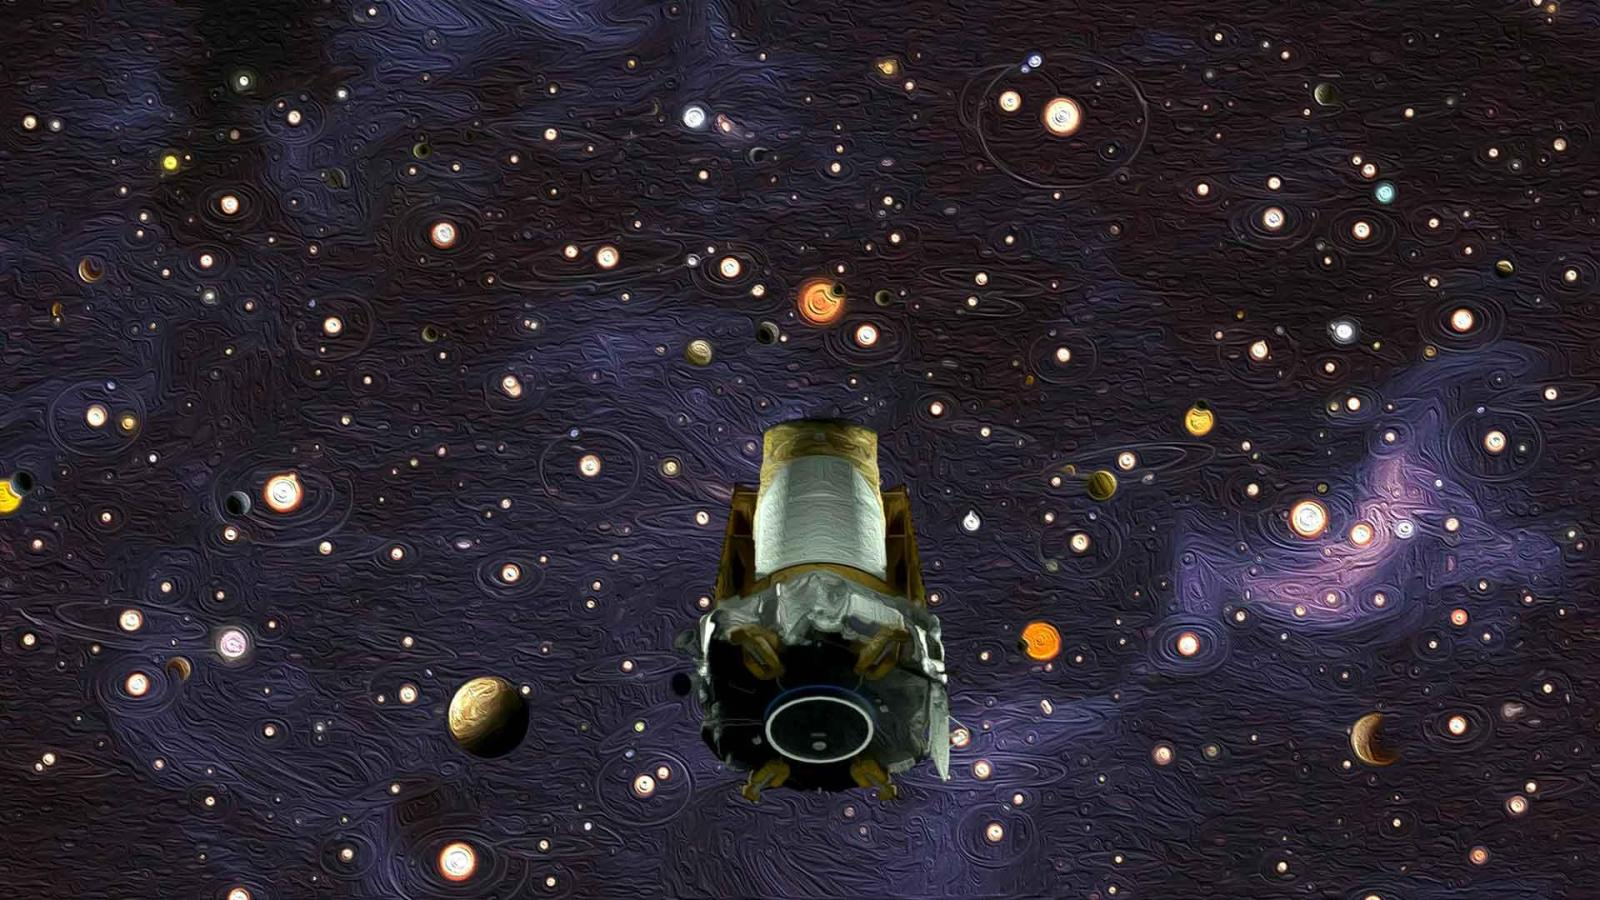

# **Here's a description of each column:**

1. **name**: The name of the exoplanet.
2. **light_years_from_earth**: The distance of the exoplanet from Earth in light years.
3. **planet_mass**: The mass of the exoplanet, usually measured in terms of Earth masses or Jupiter masses.
4. **stellar_magnitude**: The apparent brightness (magnitude) of the star that the planet orbits as seen from Earth.
5. **discovery_date**: The date when the exoplanet was discovered.
6. **planet_type**: The type or classification of the exoplanet (e.g., gas giant, terrestrial planet).
7. **planet_radius**: The radius of the exoplanet, usually measured in Earth radii or Jupiter radii.
8. **orbital_radius**: The average distance from the exoplanet to its host star, often measured in astronomical units (AU).
9. **orbital_period**: The time the exoplanet takes to complete one orbit around its host star, usually measured in Earth days or years.
10. **eccentricity**: A measure of how elliptical (non-circular) the exoplanet’s orbit is, with 0 representing a perfect circle.
11. **solar_system_name**: The name of the solar system or star system that the exoplanet belongs to.
12. **planet_discovery_method**: The method used to discover the exoplanet (e.g., transit, radial velocity).
13. **planet_orbital_inclination**: The angle of the exoplanet's orbit relative to the plane of the sky, measured in degrees.
14. **planet_density**: The density of the exoplanet, typically measured in grams per cubic centimeter (g/cm³).
15. **right_ascension**: The right ascension coordinate of the host star, a component of its location on the celestial sphere.
16. **declination**: The declination coordinate of the host star, a component of its location on the celestial sphere.
17. **host_temperature**: The surface temperature of the exoplanet’s host star, typically measured in Kelvin.
18. **host_mass**: The mass of the host star, often compared to the mass of the Sun.
19. **host_radius**: The radius of the host star, often compared to the radius of the Sun.


# **Importing libraries and Exploring the Dataset**

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

%matplotlib inline
#ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("nasa_exoplanets.csv")

In [3]:
df.head()

,row,name,light_years_from_earth,planet_mass,stellar_magnitude,discovery_date,planet_type,planet_radius,orbital_radius,orbital_period,eccentricity,solar_system_name,planet_discovery_method,planet_orbital_inclination,planet_density,right_ascension,declination,host_temperature,host_mass,host_radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,NaN,NaN,12h20m43.03s,+17d47m34.3s,4742.0,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,NaN,NaN,15h17m05.89s,+71d49m26.0s,4213.0,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,NaN,NaN,23h31m17.42s,+39d14m10.3s,4813.0,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,NaN,NaN,16h10m24.31s,+43d49m03.5s,5338.0,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,NaN,NaN,19h41m51.97s,+50d31m03.1s,5750.0,1.08,1.13


In [4]:
df.tail()

,row,name,light_years_from_earth,planet_mass,stellar_magnitude,discovery_date,planet_type,planet_radius,orbital_radius,orbital_period,eccentricity,solar_system_name,planet_discovery_method,planet_orbital_inclination,planet_density,right_ascension,declination,host_temperature,host_mass,host_radius
4279,4279,XO-6 b,773.0,4.4 Jupiters,10.250,2016,Gas Giant,2.07 x Jupiter,0.0815 AU,3.8 days,0,XO-6,Transit,86.00,0.62,06h19m10.39s,+73d49m39.7s,6720.0,1.47,1.93
4280,4280,XO-7 b,764.0,0.709 Jupiters,10.520,2019,Gas Giant,1.373 x Jupiter,0.04421 AU,2.9 days,0.04,XO-7,Transit,83.45,0.34,18h29m54.929s,+85d13m59.58s,6250.0,1.41,1.48
4281,4281,YZ Ceti b,12.0,0.75 Earths,12.074,2017,Terrestrial,0.93 x Earth,0.01557 AU,2 days,0,YZ Cet,Radial Velocity,NaN,NaN,01h12m30.64s,-16d59m56.3s,3056.0,0.13,0.17
4282,4282,YZ Ceti c,12.0,0.98 Earths,12.074,2017,Terrestrial,1.0 x Earth,0.0209 AU,3.1 days,0.04,YZ Cet,Radial Velocity,NaN,NaN,01h12m30.64s,-16d59m56.3s,3056.0,0.13,0.17
4283,4283,YZ Ceti d,12.0,1.14 Earths,12.074,2017,Super Earth,1.05 x Earth,0.02764 AU,4.7 days,0.13,YZ Cet,Radial Velocity,NaN,NaN,01h12m30.64s,-16d59m56.3s,3056.0,0.13,0.17


**Identifiers:**

- `name`: Name of the exoplanet.

- `solar_system_name`: Name of the star system.

- `right_ascension, declination`: Celestial coordinates.

**Distance and Location:**

- `light_years_from_earth`: Distance from Earth.

**Physical Characteristics:**

- planet_mass

- planet_radius

- planet_density

- host_temperature

- host_mass

- host_radius

- Orbital Properties:

- orbital_radius

- orbital_period

- eccentricity

- planet_orbital_inclination

**Observational Data:**

- stellar_magnitude

- discovery_date

- planet_discovery_method

**Classification Target:**

- `planet_type`: Gas Giant, Terrestrial Planet, etc.


info to display to the student
name
planet mass
planet_radius
planet_type
discovery_date
planet_discovery_method
host_temperature
solar_system_name

In [5]:
df.shape

(4284, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row                         4284 non-null   int64  
 1   name                        4284 non-null   object 
 2   light_years_from_earth      4274 non-null   float64
 3   planet_mass                 4284 non-null   object 
 4   stellar_magnitude           4176 non-null   float64
 5   discovery_date              4284 non-null   int64  
 6   planet_type                 4284 non-null   object 
 7   planet_radius               4284 non-null   object 
 8   orbital_radius              4284 non-null   object 
 9   orbital_period              4284 non-null   object 
 10  eccentricity                4284 non-null   object 
 11  solar_system_name           4284 non-null   object 
 12  planet_discovery_method     4284 non-null   object 
 13  planet_orbital_inclination  946 n

**Conclusion**

- Most columns have complete data (4,284 non-null values), such as `name`, `planet_type`, and `solar_system_name`.
- Some columns have missing values:
  - `light_years_from_earth` is missing 10 entries.
  - `stellar_magnitude` has 108 missing values.
  - `planet_orbital_inclination` and `planet_density` have a significant amount of missing data, with only 946 and 548 non-null entries, respectively.
  - `host_temperature`, `host_mass`, and `host_radius` also have missing values, with `host_mass` having the most incomplete data.
- Numeric columns are primarily of type `float64`, while several columns (e.g., `planet_mass`, `planet_radius`, `eccentricity`) are stored as `object`, which might need conversion to numeric for further analysis.


# **Handle Missing Values**

In [7]:
df.isna().sum()

,0
row,0
name,0
light_years_from_earth,10
planet_mass,0
stellar_magnitude,108
discovery_date,0
planet_type,0
planet_radius,0
orbital_radius,0
orbital_period,0


In [8]:
df.isna().sum() / len(df) * 100

,0
row,0.000000
name,0.000000
light_years_from_earth,0.233427
planet_mass,0.000000
stellar_magnitude,2.521008
discovery_date,0.000000
planet_type,0.000000
planet_radius,0.000000
orbital_radius,0.000000
orbital_period,0.000000


In [9]:
# Drop columns with too many missing values
df = df.drop(columns=['planet_orbital_inclination', 'planet_density'])

# Impute missing values for numeric columns
df['light_years_from_earth'].fillna(df['light_years_from_earth'].mean(), inplace=True)
df['stellar_magnitude'].fillna(df['stellar_magnitude'].median(), inplace=True)

# Impute missing values for host properties
df['host_temperature'].fillna(df['host_temperature'].median(), inplace=True)
df['host_mass'].fillna(df['host_mass'].median(), inplace=True)
df['host_radius'].fillna(df['host_radius'].mean(), inplace=True)

In [10]:
df['planet_type'].unique()

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial',
       'Unknown'], dtype=object)

In [11]:
# Count the number of times "Unkown" appears in the "planet_type" column
count_unknown = df['planet_type'].value_counts().get('Unknown', 0)

# Print the count
print(count_unknown)

6


In [12]:
#drop Unkown Values
df = df[df["planet_type"] != "Unknown"]

In [13]:
# Count the number of times "Unkown" appears in the "orbital_radius" column
count_unknown = df['orbital_radius'].value_counts().get('Unknown', 0)

# Print the count
print(count_unknown)

1557


In [14]:
df.isna().sum()

,0
row,0
name,0
light_years_from_earth,0
planet_mass,0
stellar_magnitude,0
discovery_date,0
planet_type,0
planet_radius,0
orbital_radius,0
orbital_period,0


# **Handle Data format to fit our challenge**

## **Handle Planet Radius**

In [15]:
# Function to convert radius to a common unit (Earth radii)
def convert_to_earth_radii(radius):
    if 'Jupiter' in radius:
        # Convert from Jupiter radii to Earth radii (1 Jupiter = 11.21 Earth)
        value = float(radius.split(' ')[0]) * 11.21
    elif 'Earth' in radius:
        # Already in Earth radii, so just convert the number
        value = float(radius.split(' ')[0])
    else:
        value = None  # Handle unexpected cases
    return value

# Apply the conversion function to the 'planet_radius' column
df['planet_radius_earth'] = df['planet_radius'].apply(convert_to_earth_radii)

In [16]:
df['planet_radius_earth'].describe()

,planet_radius_earth
count,4269.000000
mean,5.650370
std,5.390468
min,0.336000
25%,1.730000
50%,2.712820
75%,11.770500
max,77.349000


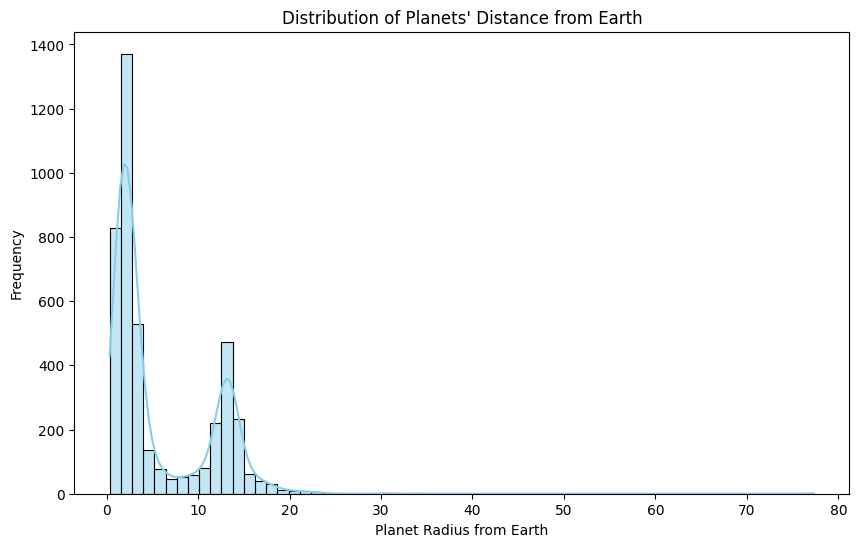

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['planet_radius_earth'], kde=True, color="skyblue")
plt.title("Distribution of Planets' Distance from Earth")
plt.xlabel("Planet Radius from Earth")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Calculate median radius for each planet type
median_radius_by_type = df.groupby('planet_type')['planet_radius_earth'].median()

# Print the results
print(median_radius_by_type)

planet_type
Gas Giant       13.11570
Neptune-like     2.79129
Super Earth      1.55000
Terrestrial      0.86000
Name: planet_radius_earth, dtype: float64


**Categories Of Planets Radius**

- **Gas Giant**: Generally the largest planets, we can divide them into:

    - **Super-Jovian**: Larger than Jupiter (radius > 11.21 Earth radii).

    - **Jovian**: Similar in size to Jupiter (1.00 - 11.21 Earth radii).

    - **Sub-Jovian**: Smaller than Jupiter (0.50 - 1.00 Earth radii).

- **Super Earth**: Planets with a mass greater than Earth's but smaller than Neptune's. We can categorize them based on their size:

    - **Mega-Earth**: Larger than Earth (radius > 1.25 Earth radii).

    - **Mini-Neptune**: Smaller than Earth (radius < 1.25 Earth radii).

- **Neptune-like**: Planets with a mass similar to Neptune's. We can categorize them based on their size:

    - **Neptune-class**: Similar in size to Neptune (radius ~ 3.88 Earth radii).

    - **Sub-Neptune**: Smaller than Neptune (radius < 3.88 Earth radii).

- **Terrestrial**: Rocky planets. We can categorize them based on their size:

    - **Earth-like**: Similar in size to Earth (radius ~ 1.00 Earth radii).

    - **Super-Earth**: Larger than Earth (radius > 1.25 Earth radii).

    - **Mini-Earth**: Smaller than Earth (radius < 0.80 Earth radii).

In [19]:
def categorize_planet_radius(row):
    planet_type = row['planet_type']
    radius = row['planet_radius_earth']

    if planet_type == 'Gas Giant':
        if radius > 11.21:
            return 'Super-Jovian'
        elif radius >= 1.00:
            return 'Jovian'
        else:
            return 'Sub-Jovian'
    elif planet_type == 'Super Earth':
        if radius > 1.25:
            return 'Mega-Earth'
        else:
            return 'Mini-Neptune'
    elif planet_type == 'Neptune-like':
        if radius >= 3.88:
            return 'Neptune-class'
        else:
            return 'Sub-Neptune'
    elif planet_type == 'Terrestrial':
        if radius > 1.25:
            return 'Super-Earth'
        elif radius >= 0.80:
            return 'Earth-like'
        else:
            return 'Mini-Earth'

df['planet_radius_category'] = df.apply(categorize_planet_radius, axis=1)

In [20]:
df['planet_radius_category'].unique()

array(['Super-Jovian', 'Jovian', 'Mega-Earth', 'Sub-Neptune',
       'Neptune-class', 'Mini-Earth', 'Mini-Neptune', 'Earth-like',
       'Sub-Jovian', 'Super-Earth'], dtype=object)

In [21]:
# Group by planet_type and mass_category, then count the occurrences
rad_category_counts = df.groupby(['planet_type', 'planet_radius_category']).size().unstack(fill_value=0)
rad_category_counts

planet_radius_category,Earth-like,Jovian,Mega-Earth,Mini-Earth,Mini-Neptune,Neptune-class,Sub-Jovian,Sub-Neptune,Super-Earth,Super-Jovian
planet_type,,,,,,,,,,
Gas Giant,0,224,0,0,0,0,9,0,0,1103
Neptune-like,0,0,0,0,0,256,0,1201,0,0
Super Earth,0,0,1041,0,281,0,0,0,0,0
Terrestrial,107,0,0,54,0,0,0,0,2,0


## **Handle Planet Mass**

In [22]:
# Conversion factor: 1 Jupiter mass ≈ 317.8 Earth masses
jupiter_to_earth_mass = 317.8

# Function to convert mass to Earth masses
def convert_to_earth_masses(mass):
    if 'Jupiters' in mass:
        # Convert from Jupiter masses to Earth masses
        value = float(mass.split(' ')[0]) * jupiter_to_earth_mass
    elif 'Earths' in mass:
        # Already in Earth masses, so just return the number
        value = float(mass.split(' ')[0])
    else:
        value = None  # Handle unexpected cases
    return value

# Apply the conversion function to the 'planet_mass' column
df['planet_mass_earth'] = df['planet_mass'].apply(convert_to_earth_masses)

In [23]:
df['planet_mass_earth'].isna().sum()

24

In [24]:
df.dropna(inplace=True)

In [25]:
df['planet_mass_earth'].describe()

,planet_mass_earth
count,4245.000000
mean,472.985201
std,4221.199884
min,0.020000
25%,3.820000
50%,8.300000
75%,158.900000
max,238985.600000


In [26]:
# Calculate median radius for each planet type
median_radius_by_type = df.groupby('planet_type')['planet_mass_earth'].median()

# Print the results
print(median_radius_by_type)

planet_type
Gas Giant       451.276
Neptune-like      8.200
Super Earth       3.120
Terrestrial       0.586
Name: planet_mass_earth, dtype: float64


**We want to categorize `planet_mass_earth` based on the median mass of its corresponding `planet_type`. This means we'll compare each planet's mass to the average mass of its type.**

In [27]:
# Calculate median mass for each planet type
median_masses = df.groupby('planet_type')['planet_mass_earth'].median()

# Create a new column based on comparison to median
def categorize_mass(row):
    median_mass = median_masses[row['planet_type']]
    if row['planet_mass_earth'] > median_mass:
        return 'Large_planet_mass'
    else:
        return 'Small_planet_mass'

df['planet_mass_category'] = df.apply(categorize_mass, axis=1)

In [28]:
df['planet_mass_category'].value_counts()

,count
planet_mass_category,
Small_planet_mass,2127
Large_planet_mass,2118


In [29]:
# Group by planet_type and mass_category, then count the occurrences
mass_category_counts = df.groupby(['planet_type', 'planet_mass_category']).size().unstack(fill_value=0)

# Print the counts for each planet_type
print(mass_category_counts)

planet_mass_category  Large_planet_mass  Small_planet_mass
planet_type                                               
Gas Giant                           650                653
Neptune-like                        728                729
Super Earth                         659                663
Terrestrial                          81                 82


## **Handle Light Years From Earth**

In [30]:
df['light_years_from_earth'].describe()

,light_years_from_earth
count,4245.000000
mean,2075.451065
std,2828.097310
min,4.000000
25%,471.000000
50%,1510.000000
75%,2796.000000
max,27727.000000


**Categories:**

- `Nearby`: Planets within the first quartile (0-473 light-years).
- `Intermediate`: Planets between the first and third quartiles (473-2805.75 light-years).
- `Distant`: Planets beyond the third quartile (2805.75-27,727 light-years).

In [31]:
df['light_years_category'] = pd.cut(df['light_years_from_earth'],
                                   bins=[0, 473, 2805.75, float('inf')],
                                   labels=['Nearby', 'Intermediate', 'Distant'])

## **Handle Host Radius**

In [32]:
df['host_radius'].describe()

,host_radius
count,4245.000000
mean,1.539965
std,3.698370
min,0.010000
25%,0.810000
50%,1.020000
75%,1.400000
max,83.800000


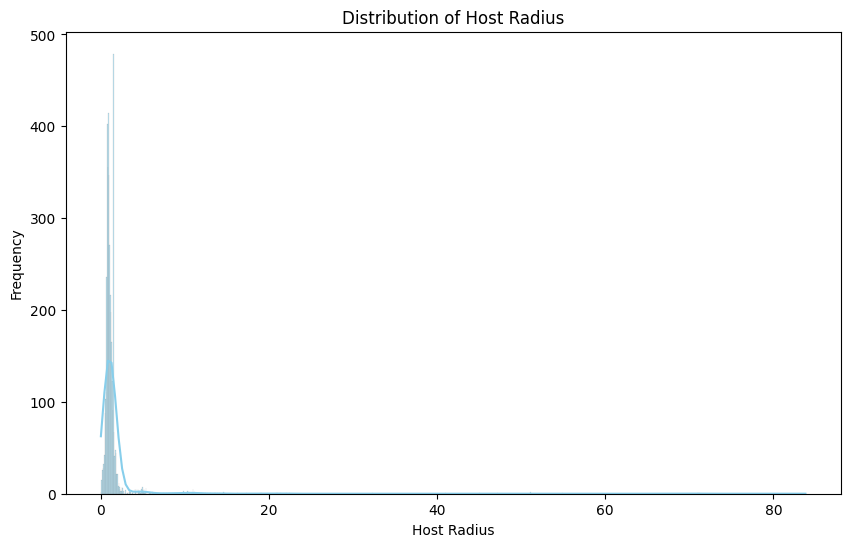

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['host_radius'], kde=True, color="skyblue")
plt.title("Distribution of Host Radius")
plt.xlabel("Host Radius")
plt.ylabel("Frequency")
plt.show()

In [34]:
q1 = np.percentile(df['host_radius'], 25)
q3 = np.percentile(df['host_radius'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['host_radius'] < (q1 - norm_range)]
upper_outliers = df[df['host_radius'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in Host Radius Column: {outliers}, Lower :{q1}, Upper: {q3}")

The number of outliers in Host Radius Column: 208, Lower :0.81, Upper: 1.4


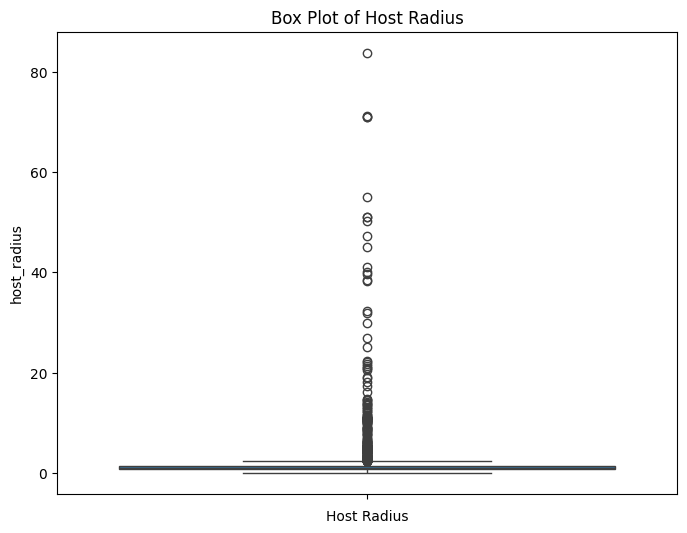

In [35]:
plt.figure(figsize=(8, 6))

# Draw a box plot for the 'host_temperature' column
sns.boxplot(data=df['host_radius'])

# Add titles and labels
plt.title('Box Plot of Host Radius')
plt.xlabel('Host Radius')

# Show the plot
plt.show()

In [36]:
# Function to count the number of records in each quartile for a given column
def count_records_in_quartiles(df, column_name):
    # Calculate the quartile values (25%, 50%, 75%)
    quartiles = df[column_name].quantile([0.25, 0.5, 0.75])

    # Define the quartile ranges
    q1_min = df[column_name].min()
    q1_max = quartiles[0.25]
    q2_max = quartiles[0.50]
    q3_max = quartiles[0.75]
    q4_max = df[column_name].max()

    # Count the number of records in each quartile
    q1_count = df[(df[column_name] >= q1_min) & (df[column_name] <= q1_max)].shape[0]
    q2_count = df[(df[column_name] > q1_max) & (df[column_name] <= q2_max)].shape[0]
    q3_count = df[(df[column_name] > q2_max) & (df[column_name] <= q3_max)].shape[0]
    q4_count = df[(df[column_name] > q3_max) & (df[column_name] <= q4_max)].shape[0]

    # Return a dictionary with the counts
    return {
        'Q1 (0% - 25%)': q1_count,
        'Q2 (25% - 50%)': q2_count,
        'Q3 (50% - 75%)': q3_count,
        'Q4 (75% - 100%)': q4_count
    }

In [37]:
result = count_records_in_quartiles(df, 'host_radius')

# Print the result
print(result)

{'Q1 (0% - 25%)': 1085, 'Q2 (25% - 50%)': 1074, 'Q3 (50% - 75%)': 1030, 'Q4 (75% - 100%)': 1056}


**Bins:**

- `0 to q1` (25th percentile): "Low"

- `q1 to q3` (25th to 75th percentiles): "Medium"

- `q3 to the maximum value` of the host_radius: "Large"

In [38]:
def categorize_host_radius(df):
    # Define the quartile boundaries
    q1 = np.percentile(df['host_radius'], 25)  # 25th percentile
    q2 = np.percentile(df['host_radius'], 50)  # 50th percentile (median)
    q3 = np.percentile(df['host_radius'], 75)  # 75th percentile

    # Create the bins based on these quartiles
    bins = [0, q1, q3, df['host_radius'].max()]  # from min to max
    labels = ['Low_host_radius', 'Medium_host_radius', 'Large_host_radius']  # Define labels for categories

    # Categorize the host_radius column
    df['host_radius_category'] = pd.cut(df['host_radius'], bins=bins, labels=labels, include_lowest=True)

    return df

In [39]:
df = categorize_host_radius(df)

In [40]:
df['host_radius_category'].value_counts()

,count
host_radius_category,
Medium_host_radius,2104
Low_host_radius,1085
Large_host_radius,1056


## **Handle Host Temperature**

In [41]:
df['host_temperature'].describe()

,host_temperature
count,4245.000000
mean,5484.463187
std,1693.844615
min,575.000000
25%,5065.000000
50%,5588.000000
75%,5899.250000
max,57000.000000


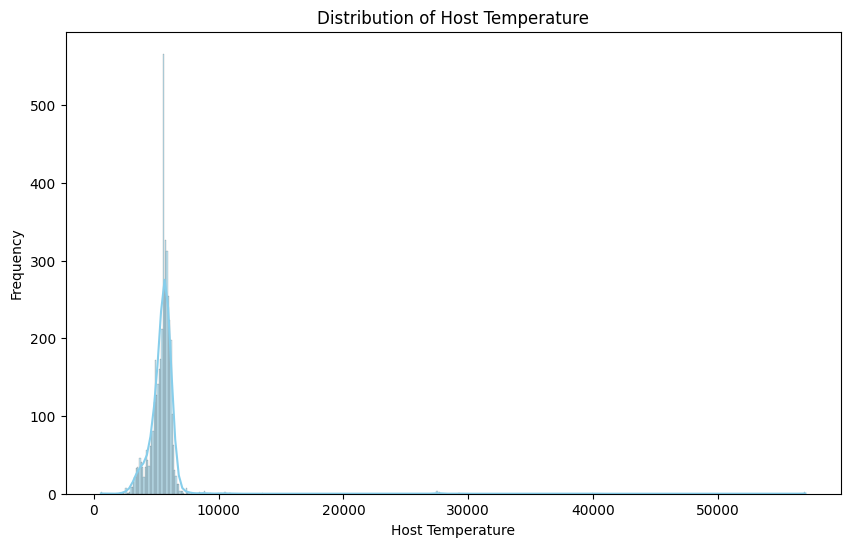

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['host_temperature'], kde=True, color="skyblue")
plt.title("Distribution of Host Temperature")
plt.xlabel("Host Temperature")
plt.ylabel("Frequency")
plt.show()

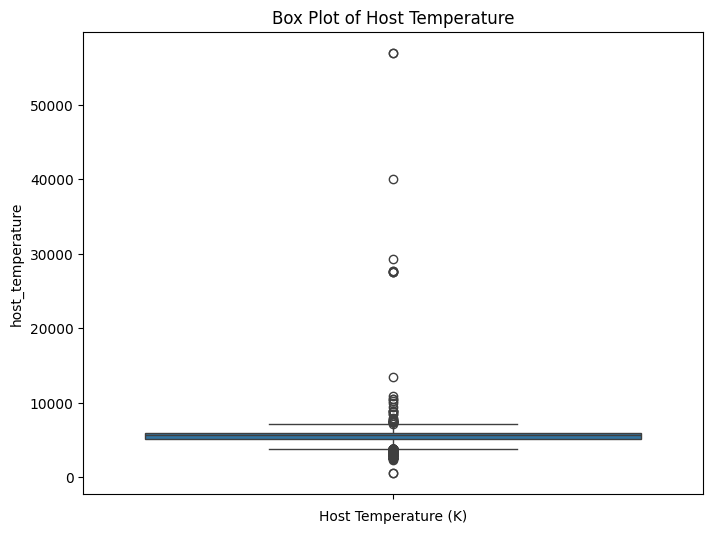

In [43]:
plt.figure(figsize=(8, 6))

# Draw a box plot for the 'host_temperature' column
sns.boxplot(data=df['host_temperature'])

# Add titles and labels
plt.title('Box Plot of Host Temperature')
plt.xlabel('Host Temperature (K)')

# Show the plot
plt.show()

In [44]:
q1 = np.percentile(df['host_temperature'], 25)
q3 = np.percentile(df['host_temperature'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['host_temperature'] < (q1 - norm_range)]
upper_outliers = df[df['host_temperature'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in Host Temperature Column : {outliers}, Lower :{q1}, Upper: {q3}")

The number of outliers in Host Temperature Column : 271, Lower :5065.0, Upper: 5899.25


In [45]:
result = count_records_in_quartiles(df, 'host_temperature')
# Print the result
print(result)

{'Q1 (0% - 25%)': 1062, 'Q2 (25% - 50%)': 1199, 'Q3 (50% - 75%)': 923, 'Q4 (75% - 100%)': 1061}


In [46]:
def categorize_temperature(temp):

    if temp < 5000:
        return 'Cool'
    elif 5000 <= temp < 6000:
        return 'Warm'
    elif 6000 <= temp:
        return 'Hot'

In [47]:
# Apply the categorization function to the 'host_temperature' column
df['host_temperature_category'] = df['host_temperature'].apply(categorize_temperature)

In [48]:
df['host_temperature_category'].value_counts()

,count
host_temperature_category,
Warm,2460
Cool,984
Hot,801


## **Handle Host Mass**

In [49]:
df['host_mass'].describe()

,host_mass
count,4245.000000
mean,0.980525
std,0.466453
min,0.010000
25%,0.850000
50%,0.960000
75%,1.080000
max,10.940000


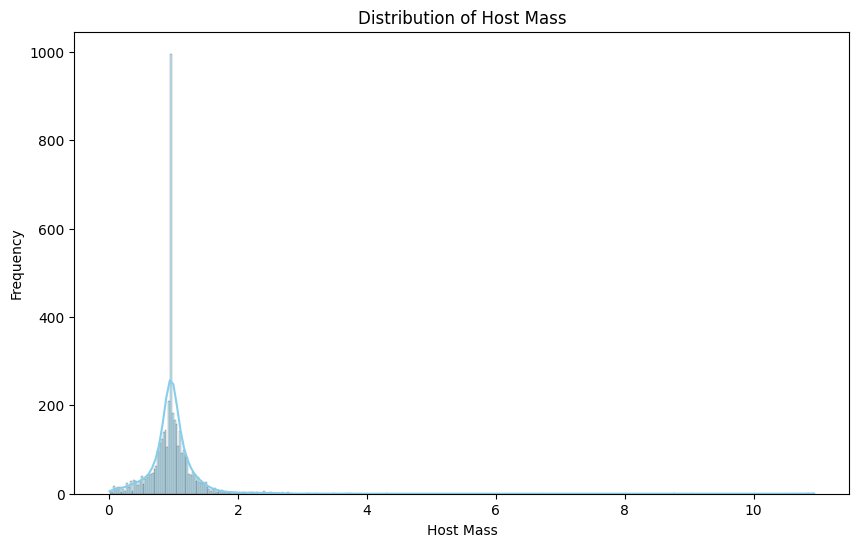

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['host_mass'], kde=True, color="skyblue")
plt.title("Distribution of Host Mass")
plt.xlabel("Host Mass")
plt.ylabel("Frequency")
plt.show()

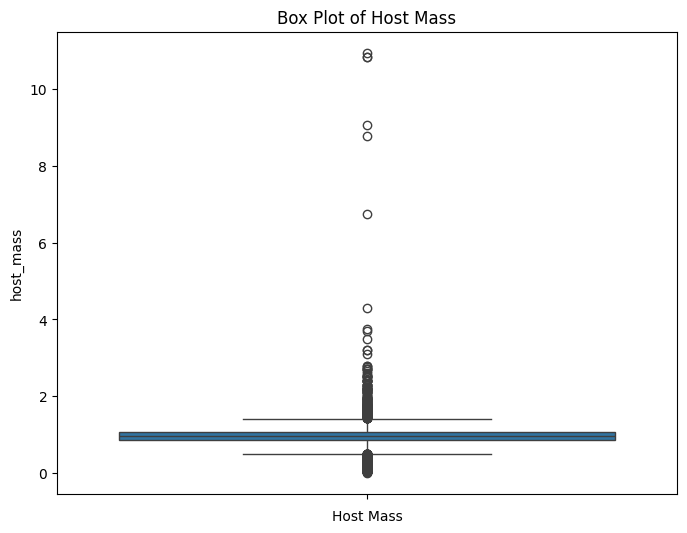

In [51]:
plt.figure(figsize=(8, 6))

# Draw a box plot for the 'host_temperature' column
sns.boxplot(data=df['host_mass'])

# Add titles and labels
plt.title('Box Plot of Host Mass')
plt.xlabel('Host Mass')

# Show the plot
plt.show()

In [52]:
q1 = np.percentile(df['host_mass'], 25)
q3 = np.percentile(df['host_mass'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['host_mass'] < (q1 - norm_range)]
upper_outliers = df[df['host_mass'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in Host Mass Column : {outliers}, Lower :{q1}, Upper: {q3}")

The number of outliers in Host Mass Column : 550, Lower :0.85, Upper: 1.08


In [53]:
result = count_records_in_quartiles(df, 'host_mass')
# Print the result
print(result)

{'Q1 (0% - 25%)': 1096, 'Q2 (25% - 50%)': 1453, 'Q3 (50% - 75%)': 668, 'Q4 (75% - 100%)': 1028}


***Bins:***

- `0 to q`1 are classified as "Low".

- `q1 to q3` are "Medium".

- `q3 to the maximum value` are "Large".

In [54]:
def categorize_host_mass(df):
    # Define the quartile boundaries based on the statistics
    q1 = np.percentile(df['host_mass'], 25)  # 25th percentile
    q2 = np.percentile(df['host_mass'], 50)  # 50th percentile (median)
    q3 = np.percentile(df['host_mass'], 75)  # 75th percentile

    # Create the bins based on these quartiles
    bins = [0, q1, q3, df['host_mass'].max()]  # from min to max
    labels = ['Low_host_mass', 'Medium_host_mass', 'Large_host_mass']  # Define labels for categories

    # Categorize the host_mass column
    df['host_mass_category'] = pd.cut(df['host_mass'], bins=bins, labels=labels, include_lowest=True)

    return df

In [55]:
# Apply the categorization function to the 'host_mass' column
df = categorize_host_mass(df)

In [56]:
df.value_counts('host_mass_category')

,count
host_mass_category,
Medium_host_mass,2121
Low_host_mass,1096
Large_host_mass,1028


## **Handle Eccentricity**

In [57]:
df['eccentricity'].head(25)

,eccentricity
0,0.23
1,0.08
2,0
3,0.37
4,0.68
5,0.08
6,0
7,0.04
8,0.09
9,0.29


In [58]:
df['eccentricity'] = pd.to_numeric(df['eccentricity'], errors='coerce')

In [59]:
df['eccentricity'].isna().sum()

161

In [60]:
df.dropna(subset=['eccentricity'], inplace=True)

In [61]:
df['eccentricity'].describe()

,eccentricity
count,4084.000000
mean,0.055081
std,0.132345
min,0.000000
25%,0.000000
50%,0.000000
75%,0.030000
max,0.950000


In [62]:
result = count_records_in_quartiles(df, 'eccentricity')
# Print the result
print(result)

{'Q1 (0% - 25%)': 2945, 'Q2 (25% - 50%)': 0, 'Q3 (50% - 75%)': 137, 'Q4 (75% - 100%)': 1002}


In [63]:
q3 = np.percentile(df['eccentricity'], 75)

In [64]:
def categorize_eccentricity(eccentricity):

    if eccentricity < q3:
        return 'Low_eccentricity'
    elif q3 <=eccentricity:
        return 'High_eccentricity'

In [65]:
# Apply the categorization function to the 'eccentricity' column
df['eccentricity_category'] = df['eccentricity'].apply(categorize_eccentricity)

In [66]:
df['eccentricity_category'].value_counts()

,count
eccentricity_category,
Low_eccentricity,3033
High_eccentricity,1051


## **Handle Stellar Magnitude**

In [67]:
df['stellar_magnitude'].describe()

,stellar_magnitude
count,4084.000000
mean,12.678708
std,2.922788
min,0.850000
25%,11.423000
50%,13.563000
75%,14.862250
max,20.480000


In [68]:
med=df['stellar_magnitude'].median()
def categorize_stellar_magnitude(stellar_magnitude):
    if stellar_magnitude < med:
        return 'Low_stellar_magnitude'
    else:
        return 'High_stellar_magnitude'

In [69]:
# Apply the categorization function to the 'eccentricity' column
df['stellar_magnitude_category'] = df['stellar_magnitude'].apply(categorize_stellar_magnitude)

In [70]:
df['stellar_magnitude_category'].value_counts()

,count
stellar_magnitude_category,
High_stellar_magnitude,2109
Low_stellar_magnitude,1975


# **Handling Duplicates**

In [71]:
df.duplicated().sum()

0

# **Data Visualization**

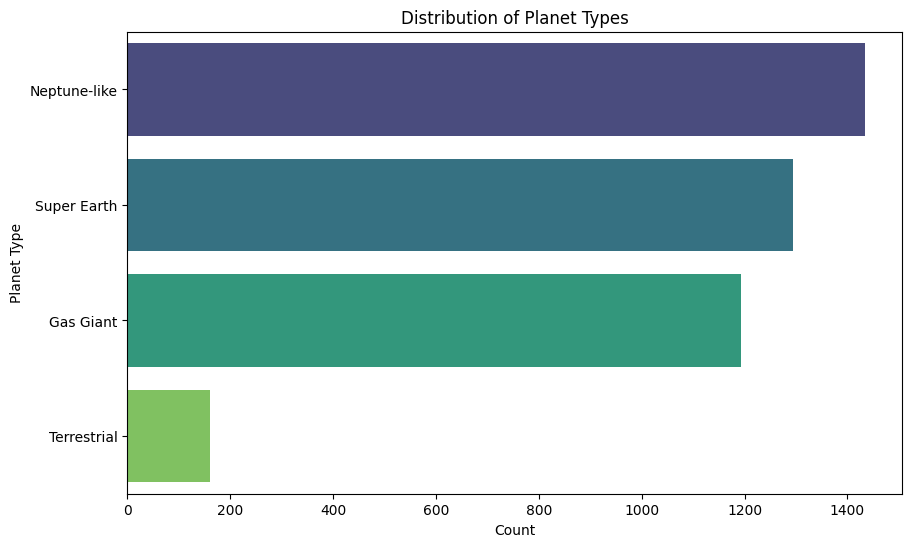

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(y='planet_type', data=df, palette="viridis", order=df['planet_type'].value_counts().index)
plt.title("Distribution of Planet Types")
plt.xlabel("Count")
plt.ylabel("Planet Type")
plt.show()

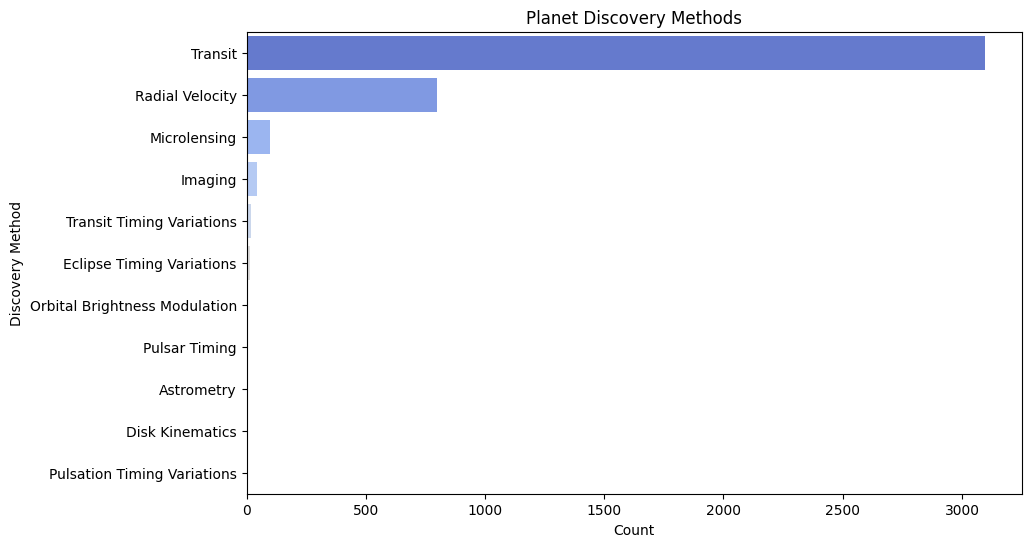

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(y='planet_discovery_method', data=df, palette="coolwarm", order=df['planet_discovery_method'].value_counts().index)
plt.title("Planet Discovery Methods")
plt.xlabel("Count")
plt.ylabel("Discovery Method")
plt.show()

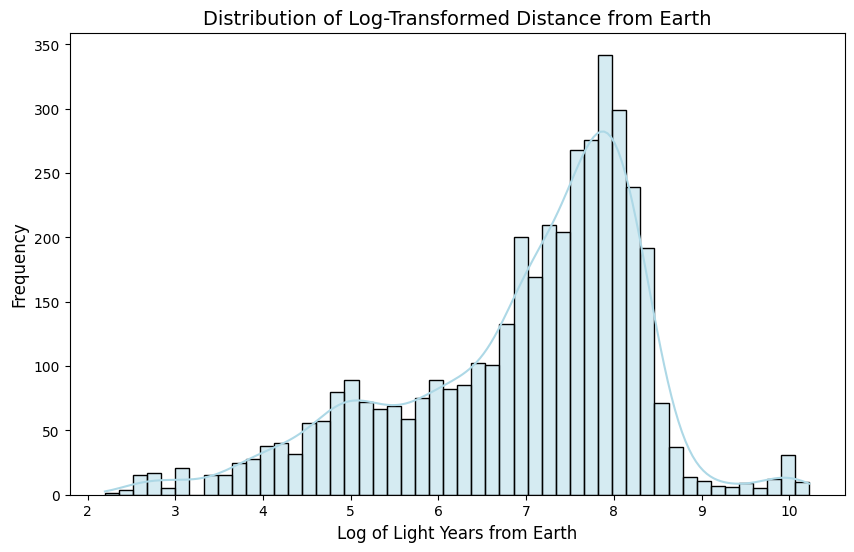

In [74]:
# Avoid issues with log(0) by adding a small constant (e.g., 1)
df['log_light_years'] = np.log1p(df['light_years_from_earth'])

# Plot the transformed data
plt.figure(figsize=(10, 6))

# Plot with kde to show the density
sns.histplot(df['log_light_years'], bins=50, kde=True, color='lightblue')

# Label the axes
plt.xlabel('Log of Light Years from Earth', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set a title
plt.title("Distribution of Log-Transformed Distance from Earth", fontsize=14)

# Display the plot
plt.show()


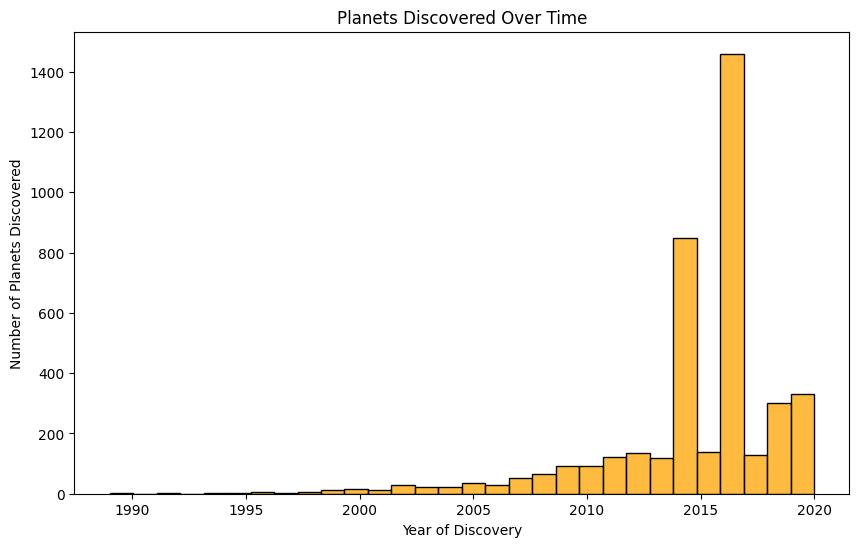

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discovery_date'], bins=30, kde=False, color="orange")
plt.title("Planets Discovered Over Time")
plt.xlabel("Year of Discovery")
plt.ylabel("Number of Planets Discovered")
plt.show()

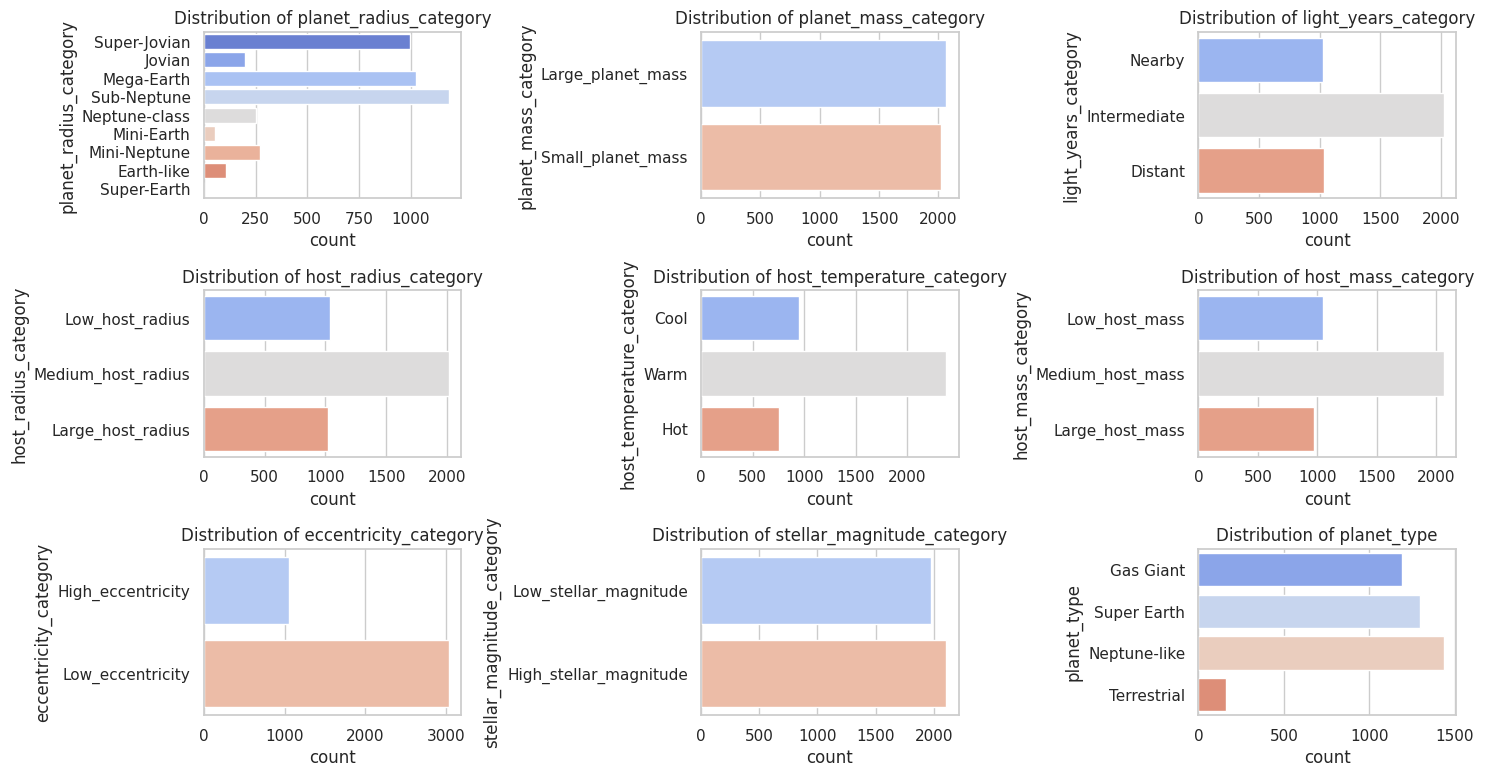

In [76]:
plt.figure(figsize=(15, 10))

# Create count plots for multiple categorical features
sns.set(style="whitegrid")

# List of features to visualize
features = ['planet_radius_category', 'planet_mass_category','light_years_category',
       'host_radius_category', 'host_temperature_category',
       'host_mass_category','eccentricity_category', 'stellar_magnitude_category', 'planet_type']

# Plot countplots for all features
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=feature, data=df, palette='coolwarm')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

# **Encoding Categorical Variables**

In [77]:
df['planet_type'] = df['planet_type'].map({'Neptune-like':0,'Gas Giant':1, 'Super Earth':2, 'Terrestrial':3}).astype(int)

In [78]:
df['planet_radius_category'] = df['planet_radius_category'].map({'Sub-Neptune':0,'Super-Jovian':1, 'Mega-Earth':2, 'Mini-Neptune':3, 'Neptune-class':4, 'Jovian':5, 'Earth-like':6, 'Mini-Earth':7, 'Sub-Jovian':8, 'Super-Earth':9}).astype(int)

In [79]:
df['light_years_category']=df['light_years_category'].map({'Nearby':0,'Intermediate':1, 'Distant':2}).astype(int)

In [80]:
df['planet_mass_category']=df['planet_mass_category'].map({'Small_planet_mass':0,'Large_planet_mass':1}).astype(int)

In [81]:
df['host_radius_category']=df['host_radius_category'].map({'Low_host_radius':0,'Medium_host_radius':1, 'Large_host_radius':2}).astype(int)

In [82]:
df['host_mass_category']=df['host_mass_category'].map({'Low_host_mass':0,'Medium_host_mass':1, 'Large_host_mass':2}).astype(int)

In [83]:
df['host_temperature_category']=df['host_temperature_category'].map({'Cool':0,'Warm':1, 'Hot':2}).astype(int)

In [84]:
df['eccentricity_category']=df['eccentricity_category'].map({'Low_eccentricity':0,'High_eccentricity':1}).astype(int)

In [85]:
df['stellar_magnitude_category']=df['stellar_magnitude_category'].map({'Low_stellar_magnitude':0,'High_stellar_magnitude':1}).astype(int)

# **Feature Selection**

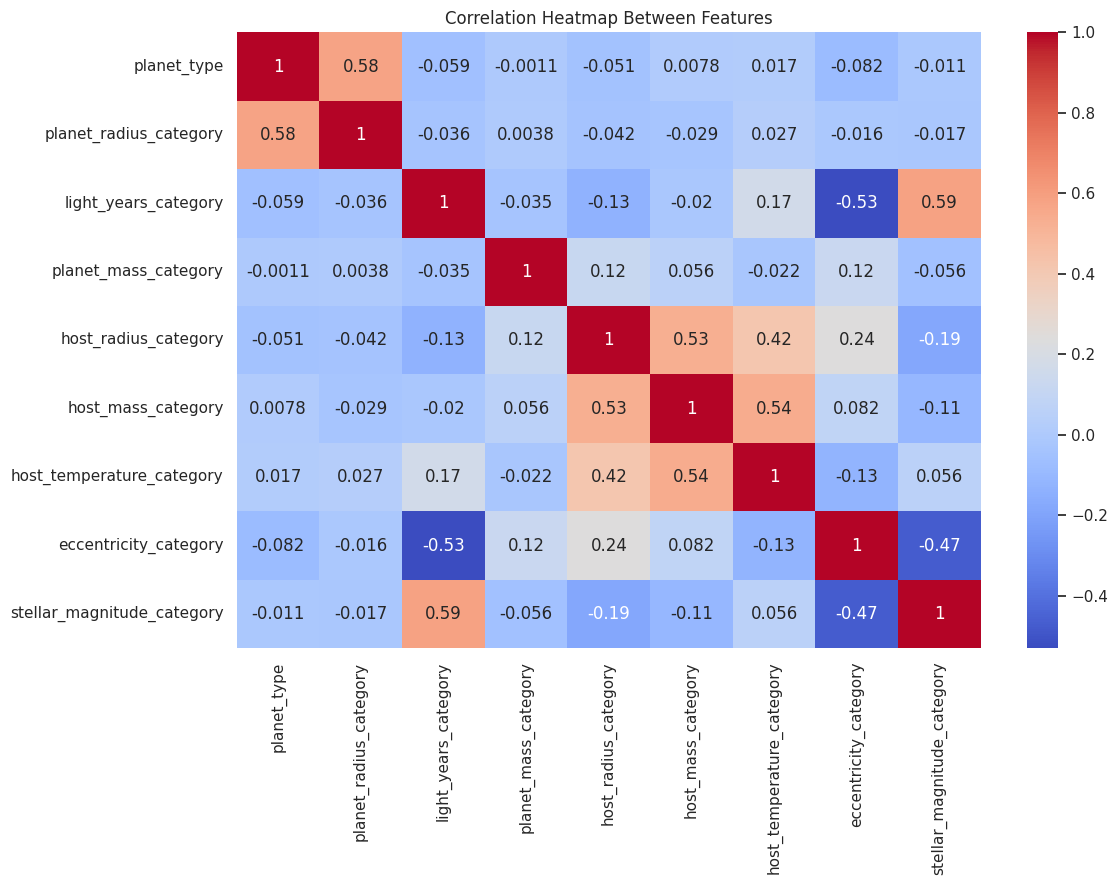

In [86]:
plt.figure(figsize=(12, 8))
corr_matrix = df[['planet_type','planet_radius_category', 'light_years_category', 'planet_mass_category', 'host_radius_category', 'host_mass_category','host_temperature_category','eccentricity_category','stellar_magnitude_category']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Features")
plt.show()

# **Data Spliting**

In [87]:
# Split into features and target
X = df[['planet_radius_category', 'light_years_category', 'planet_mass_category', 'host_radius_category', 'host_mass_category','host_temperature_category','eccentricity_category','stellar_magnitude_category']]
y = df['planet_type']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X.head()

,planet_radius_category,light_years_category,planet_mass_category,host_radius_category,host_mass_category,host_temperature_category,eccentricity_category,stellar_magnitude_category
0,1,0,1,2,2,0,1,0
1,1,0,1,2,2,0,1,0
2,1,0,1,2,2,0,0,0
3,1,0,1,1,1,1,1,0
4,1,0,1,1,1,1,1,0


# **Classification Models**

## **1. Logistic Regression**

In [89]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=200)  # Increase max_iter if needed
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       285
           1       0.64      0.73      0.68       227
           2       0.81      0.82      0.81       279
           3       1.00      1.00      1.00        26

    accuracy                           0.77       817
   macro avg       0.82      0.82      0.82       817
weighted avg       0.78      0.77      0.78       817

Logistic Regression Accuracy: 0.773561811505508


## **2. Decision Tree Model**

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00        26

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817

Decision Tree Accuracy: 1.0


## **3. Random Forest Model**

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.98      0.97      0.98       227
           2       0.99      1.00      0.99       279
           3       1.00      0.92      0.96        26

    accuracy                           0.99       817
   macro avg       0.99      0.97      0.98       817
weighted avg       0.99      0.99      0.99       817

Random Forest Accuracy: 0.9865361077111383


## **4. SVM Model**

In [92]:
from sklearn.svm import SVC

# Initialize the model
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00        26

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817

SVM Accuracy: 1.0


## **5. XGBoost Model**

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_gb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00        26

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817

XGBoost Accuracy: 1.0


## **6. Neural Network Model**

In [94]:
from keras.models import Sequential
from keras.layers import Dense

# Create Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(len(y.unique()), activation='softmax'))  # Output layer (for multi-class classification)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=15, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Accuracy:", accuracy)

Epoch 1/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6727 - loss: 0.9846
Epoch 2/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3946
Epoch 3/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.2116
Epoch 4/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.1197
Epoch 5/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0909
Epoch 6/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: 0.0708
Epoch 7/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0554
Epoch 8/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0433
Epoch 9/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0412
Epoch 10/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0262
Epoch 11/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0212
Epoch 12/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

# **Model Evaluation**

In [95]:
#creating a dataframe to compare between the accuracy of each model
from sklearn import metrics
model={'models':['logistic regression','desicion tree', 'Random Forest', 'SVM','XGboost'],'accuracy':[metrics.accuracy_score(y_test,y_pred_log_reg),metrics.accuracy_score(y_test,y_pred_dt),metrics.accuracy_score(y_test,y_pred_rf),metrics.accuracy_score(y_test,y_pred_svm),metrics.accuracy_score(y_test,y_pred_gb)]}
model_df=pd.DataFrame(model)
model_df

,models,accuracy
0,logistic regression,0.773562
1,desicion tree,1.000000
2,Random Forest,0.986536
3,SVM,1.000000
4,XGboost,1.000000


<Axes: xlabel='models', ylabel='accuracy'>

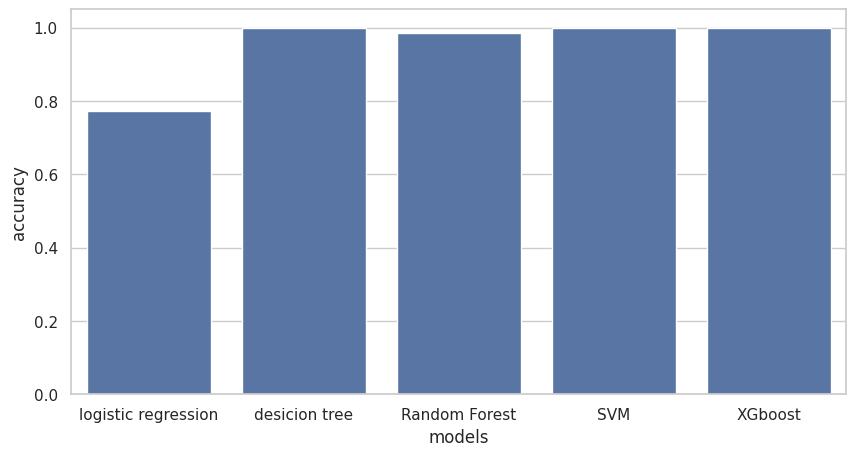

In [96]:
#visualizing the accuracy of each model
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='models',y='accuracy',data=model_df)

# **Save Model**

In [97]:
import joblib
joblib.dump(dt_model, 'New_model.joblib')

['New_model.joblib']

In [98]:
import pickle
# Save model object to a file & run it in notebook
pickle.dump(dt_model, open('My_pickeld_model', 'wb'))